In [2]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
import pandas as pd
from tqdm import tqdm

# Charger les données
df = pd.read_excel(r'C:\Users\malek\Downloads\mission\mission\cleaned_job_data_balanced.xlsx')

# Vérifier les valeurs uniques dans la colonne 'fraudulent'
count_values = df['fraudulent'].value_counts()
percent_values = df['fraudulent'].value_counts(normalize=True) * 100

print("📊 Répartition des classes (fraudulent):")
print(count_values)
print("\n📈 Pourcentages:")
print(percent_values.round(2))

# Affichage graphique
plt.figure(figsize=(6, 4))
count_values.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title("Répartition des offres frauduleuses vs non frauduleuses")
plt.xlabel("Classe (0 = non frauduleux, 1 = frauduleux)")
plt.ylabel("Nombre d'offres")
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

# Initialiser tqdm pour Pandas (optionnel mais utile pour de très grosses opérations)
tqdm.pandas()

print("🔍 Étape 1 : Chargement des données...")

# Séparer les variables explicatives (X) et la cible (y)
X = df.drop(columns=['fraudulent'])
y = df['fraudulent']

print("🔄 Étape 2 : Encodage des variables catégorielles...")
X_encoded = pd.get_dummies(X)

print("✂️ Étape 3 : Séparation train/test...")
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, stratify=y, random_state=42)

print("📈 Étape 4 : Application de SMOTE (oversampling)...")
# Affiche une barre de progression fictive pour simuler le temps de traitement
for _ in tqdm(range(1), desc="🧠 SMOTE en cours"):
    smote = SMOTE(random_state=42)
    X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

print("🧩 Étape 5 : Construction du DataFrame final...")
df_resampled = pd.concat([X_resampled, y_resampled], axis=1)

print("💾 Étape 6 : Sauvegarde en CSV...")
for _ in tqdm(range(1), desc="💽 Sauvegarde"):
    df_resampled.to_csv(r'C:\Users\malek\Downloads\mission\mission\cleaned_job_data_balanced_SMOTE.csv', index=False)

print("✅ Nouveau dataset rééquilibré sauvegardé en CSV.")


🔍 Étape 1 : Chargement des données...
🔄 Étape 2 : Encodage des variables catégorielles...
✂️ Étape 3 : Séparation train/test...



🧠 SMOTE en cours:   0%|          | 0/1 [00:00<?, ?it/s]

📈 Étape 4 : Application de SMOTE (oversampling)...


🧠 SMOTE en cours: 100%|██████████| 1/1 [01:31<00:00, 91.43s/it]


🧩 Étape 5 : Construction du DataFrame final...



💽 Sauvegarde:   0%|          | 0/1 [00:00<?, ?it/s]

💾 Étape 6 : Sauvegarde en CSV...


💽 Sauvegarde: 100%|██████████| 1/1 [25:17<00:00, 1517.53s/it]

✅ Nouveau dataset rééquilibré sauvegardé en CSV.


                                                   title  \
0                                        IC&E Technician   
1                                           Forward Cap.   
2                      Technician Instrument & Controls    
3                                        Sales Executive   
4                                IC&E Technician Mt Poso   
...                                                  ...   
15108  Remote Admin Assistant â€“ No Experience Required   
15109  Remote Admin Assistant â€“ No Experience Required   
15110      Work From Home Data Entry â€“ Immediate Start   
15111   Online Customer Support Needed â€“ Earn $500/Day   
15112   Online Customer Support Needed â€“ Earn $500/Day   

                                 location            department  \
0                       US, , Stocton, CA          Oil & Energy   
1                                     NaN                   NaN   
2                                      US  Power Plant & Energy   
3          

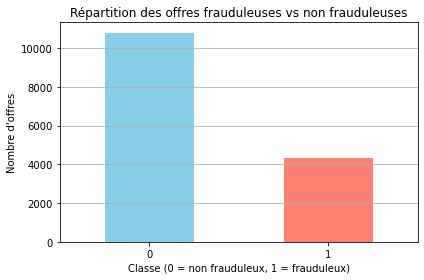

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Charger les données
df = pd.read_excel(r'C:/Users/malek/Downloads/mission/mission/cleaned_job_data_balanced.xlsx')
print(df.iloc[:, :5])

# Vérifier les valeurs uniques dans la colonne 'fraudulent'
count_values = df['fraudulent'].value_counts()
percent_values = df['fraudulent'].value_counts(normalize=True) * 100
print("📊 Répartition des classes (fraudulent):")
print(count_values)
print("\n📈 Pourcentages:")
print(percent_values.round(2))

# Affichage graphique
plt.figure(figsize=(6, 4))
count_values.plot(kind='bar', color=['skyblue', 'salmon'])
plt.title("Répartition des offres frauduleuses vs non frauduleuses")
plt.xlabel("Classe (0 = non frauduleux, 1 = frauduleux)")
plt.ylabel("Nombre d'offres")
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [6]:
import pandas as pd
import numpy as np
import joblib

import re
import os

# 🔹 1. Charger les données
file_path = r'C:/Users/malek/Downloads/mission/mission/cleaned_job_data_balanced.xlsx'
df = pd.read_excel(file_path)

# 🔹 2. Nettoyage de base des chaînes de caractères
def clean_text(text):
    if pd.isnull(text):
        return ""
    text = str(text).lower()
    text = re.sub(r'\s+', ' ', text)                     # espaces multiples → simple espace
    text = re.sub(r'[^a-zA-Z0-9\s]', '', text)           # suppression caractères spéciaux
    return text.strip()

# Colonnes texte à nettoyer
text_cols = ['title', 'location', 'department', 'salary_range', 'company_profile',
             'description', 'requirements', 'benefits', 'industry', 'function']

for col in text_cols:
    df[col] = df[col].apply(clean_text)

# 🔹 3. Remplacer les NaN texte par chaîne vide
df[text_cols] = df[text_cols].fillna('')

# 🔹 4. Créer une colonne de texte combiné
df['combined_text'] = (
    df['title'] + ' ' + df['company_profile'] + ' ' +
    df['description'] + ' ' + df['requirements'] + ' ' + df['benefits']
).apply(clean_text)

# 🔹 5. Ajouter des longueurs de texte
df['description_length'] = df['description'].apply(lambda x: len(x.split()))
df['requirements_length'] = df['requirements'].apply(lambda x: len(x.split()))
df['company_profile_length'] = df['company_profile'].apply(lambda x: len(x.split()))
df['benefits_length'] = df['benefits'].apply(lambda x: len(x.split()))

# 🔹 6. Supprimer les colonnes redondantes
df = df.drop(columns=['state_city'], errors='ignore')

# 🔹 7. Convertir colonnes booléennes
for col in ['telecommuting', 'has_company_logo', 'has_questions']:
    df[col] = df[col].astype(int)

# 🔹 8. Supprimer les doublons
df = df.drop_duplicates()

# 🔹 9. Afficher les valeurs manquantes restantes
missing = df.isnull().sum()
print("🧼 Valeurs manquantes restantes :")
print(missing[missing > 0])

# 🔹 10. Sauvegarder le fichier nettoyé dans le même dossier
output_path = os.path.join(os.path.dirname(file_path), 'job_data_cleaned_ready.csv')
df.to_csv(output_path, index=False)
print(f"\n✅ Données nettoyées et sauvegardées ici : {output_path}")


🧼 Valeurs manquantes restantes :
state      1566
city       1217
Country     307
dtype: int64

✅ Données nettoyées et sauvegardées ici : C:/Users/malek/Downloads/mission/mission\job_data_cleaned_ready.csv


Colonnes catégorielles utilisées: ['employment_type', 'required_experience', 'required_education', 'industry', 'function', 'state', 'city', 'Country']
▶️ Entraînement du modèle (GridSearchCV)...
Fitting 5 folds for each of 24 candidates, totalling 120 fits
[ColumnTransformer] ......... (1 of 3) Processing tfidf, total=   4.3s
[ColumnTransformer] ........... (2 of 3) Processing ohe, total=   0.1s
[ColumnTransformer] ........ (3 of 3) Processing scaler, total=   0.0s
✅ Meilleurs paramètres : {'clf__max_depth': 15, 'clf__min_samples_leaf': 2, 'clf__min_samples_split': 5, 'clf__n_estimators': 100}

📊 Classification Report :
              precision    recall  f1-score   support

           0     0.9690    1.0000    0.9842      3403
           1     1.0000    0.3699    0.5401       173

    accuracy                         0.9695      3576
   macro avg     0.9845    0.6850    0.7622      3576
weighted avg     0.9705    0.9695    0.9627      3576



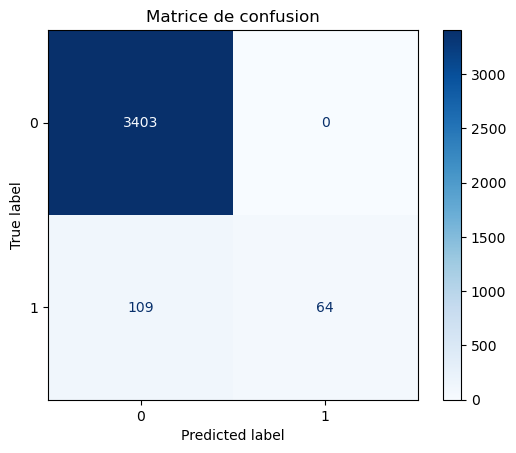

🏅 AUC-ROC on test set: 0.9853
Pipeline sauvegardé dans rf_pipeline.pkl


In [7]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import joblib

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay, roc_auc_score

# 1. Charger les données nettoyées
file_path = r'C:/Users/malek/Downloads/ME/ME/fake_job_postings.csv'
df = pd.read_csv(file_path)

# Créer la colonne 'combined_text' en combinant les colonnes textuelles
df['combined_text'] = df['title'].fillna('') + ' ' + \
                      df['location'].fillna('') + ' ' + \
                      df['department'].fillna('') + ' ' + \
                      df['company_profile'].fillna('') + ' ' + \
                      df['description'].fillna('') + ' ' + \
                      df['requirements'].fillna('') + ' ' + \
                      df['benefits'].fillna('')

# Créer les colonnes de longueur de texte
df['description_length'] = df['description'].fillna('').apply(len)
df['requirements_length'] = df['requirements'].fillna('').apply(len)
df['company_profile_length'] = df['company_profile'].fillna('').apply(len)
df['benefits_length'] = df['benefits'].fillna('').apply(len)

# Extraire state, city et Country à partir de location
if 'state' not in df.columns or 'city' not in df.columns or 'Country' not in df.columns:
    df[['city', 'state', 'Country']] = df['location'].str.split(',', expand=True, n=2)
    for col in ['city', 'state', 'Country']:
        if col in df.columns:
            df[col] = df[col].fillna('Unknown').str.strip()

# 2. Séparer features et target
y = df['fraudulent']
X = df.drop(columns=['fraudulent'])

# 3. Définir les types de colonnes
text_feature   = 'combined_text'
cat_features   = ['employment_type', 'required_experience', 'required_education',
                  'industry', 'function']
                  
# Vérifier si les colonnes géographiques existent avant de les ajouter
geo_features = []
for col in ['state', 'city', 'Country']:
    if col in df.columns:
        geo_features.append(col)
        
cat_features = cat_features + geo_features

# Vérifier que toutes les colonnes catégorielles existent
cat_features = [col for col in cat_features if col in df.columns]
print(f"Colonnes catégorielles utilisées: {cat_features}")

num_features   = ['description_length', 'requirements_length',
                  'company_profile_length', 'benefits_length']

# 4. Split train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

# 5. Préprocesseur
preprocessor = ColumnTransformer(transformers=[
    # TF-IDF sur le texte - réduire max_features pour limiter l'overfitting
    ('tfidf', TfidfVectorizer(max_features=10000, ngram_range=(1,1)), text_feature),
    # OneHot sur catégorielles
    ('ohe', OneHotEncoder(handle_unknown='ignore', sparse_output=False), cat_features),
    # Standardisation sur numériques
    ('scaler', StandardScaler(), num_features)
], remainder='drop', verbose=True)

# 6. Pipeline avec RandomForest - ajuster les paramètres pour réduire l'overfitting
pipeline = Pipeline([
    ('preproc', preprocessor),
    ('clf', RandomForestClassifier(
        n_estimators=100,
        max_depth=10,  # Limiter la profondeur pour réduire l'overfitting
        min_samples_split=5,  # Exiger plus d'échantillons pour diviser un nœud
        min_samples_leaf=4,   # Exiger plus d'échantillons dans chaque feuille
        max_features='sqrt',  # Limiter le nombre de features considérées à chaque split
        bootstrap=True,
        oob_score=True,       # Utiliser out-of-bag pour estimer la performance
        n_jobs=-1,
        random_state=42
    ))
])

# 7. Recherche d'hyperparamètres avec focus sur la réduction de l'overfitting
param_grid = {
    'clf__n_estimators': [100, 200],
    'clf__max_depth': [8, 10, 15],
    'clf__min_samples_split': [5, 10],
    'clf__min_samples_leaf': [2, 4]
}
grid = GridSearchCV(
    pipeline,
    param_grid,
    cv=5,
    scoring='f1',
    n_jobs=-1,
    verbose=2
)

# 8. Entraînement
print("▶️ Entraînement du modèle (GridSearchCV)...")
grid.fit(X_train, y_train)
print("✅ Meilleurs paramètres :", grid.best_params_)

# 9. Évaluation sur le test set
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)
y_proba = best_model.predict_proba(X_test)[:, 1]

print("\n📊 Classification Report :")
print(classification_report(y_test, y_pred, digits=4))

# 10. Matrice de confusion
cm = confusion_matrix(y_test, y_pred, labels=best_model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Matrice de confusion")
plt.show()

# 11. ROC AUC
auc = roc_auc_score(y_test, y_proba)
print(f"🏅 AUC-ROC on test set: {auc:.4f}")
joblib.dump(best_model, 'rf_pipeline.pkl')
print("Pipeline sauvegardé dans rf_pipeline.pkl")

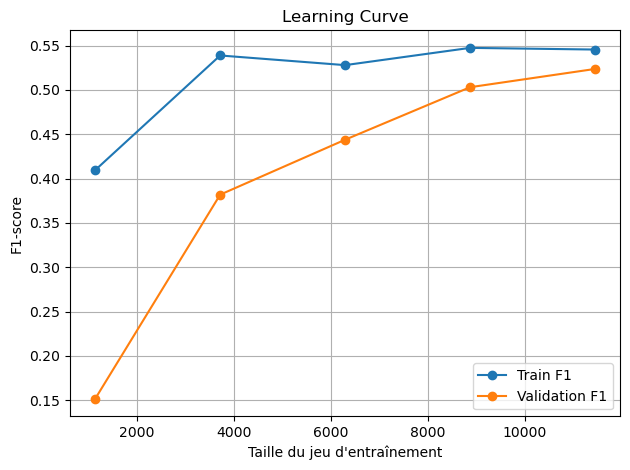

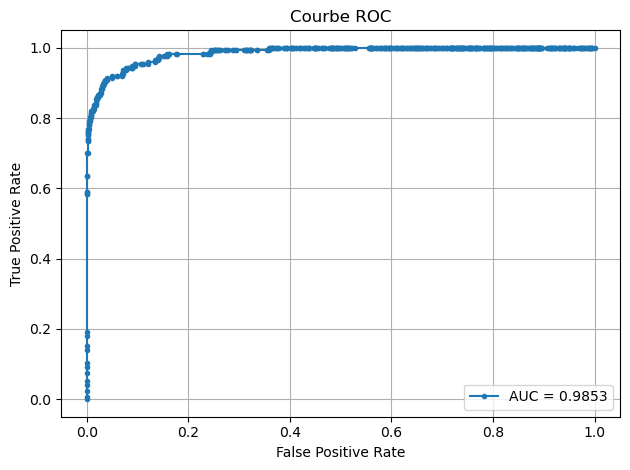

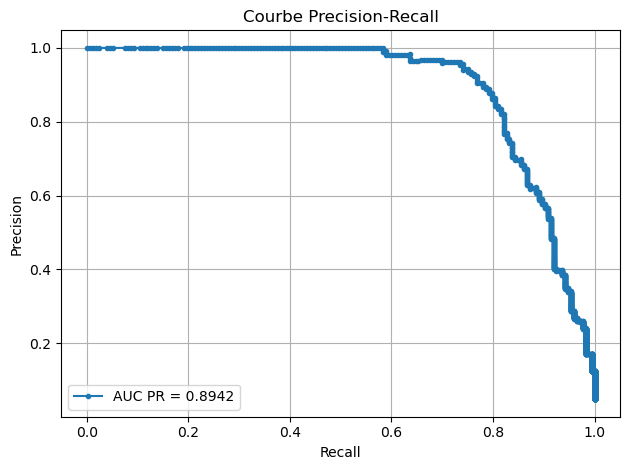

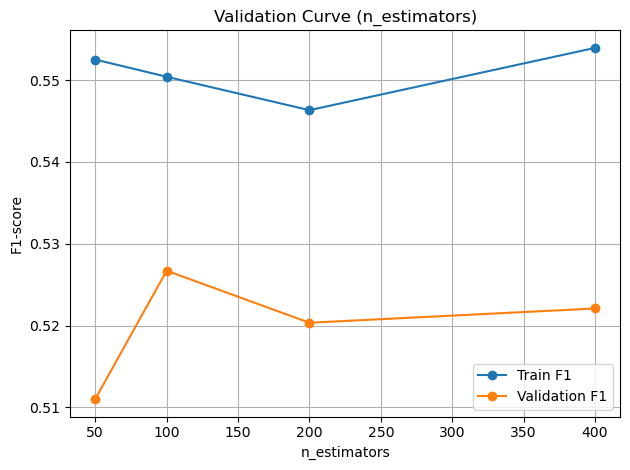

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import joblib

from sklearn.model_selection import train_test_split, learning_curve, validation_curve
from sklearn.metrics import roc_curve, precision_recall_curve, auc

# ———————————————————————————————
# 1. Chargement des données et du modèle
# ———————————————————————————————
# Chemins à ajuster si besoin
DATA_PATH     = r'C:/Users/malek/Downloads/ME/ME/fake_job_postings.csv'
PIPELINE_PATH = r'C:/Users/malek/rf_pipeline.pkl'

df = pd.read_csv(DATA_PATH)
model_pipeline = joblib.load(PIPELINE_PATH)

# Créer la colonne 'combined_text' en combinant les colonnes textuelles
df['combined_text'] = df['title'].fillna('') + ' ' + \
                      df['location'].fillna('') + ' ' + \
                      df['department'].fillna('') + ' ' + \
                      df['company_profile'].fillna('') + ' ' + \
                      df['description'].fillna('') + ' ' + \
                      df['requirements'].fillna('') + ' ' + \
                      df['benefits'].fillna('')

# Créer les colonnes de longueur de texte
df['description_length'] = df['description'].fillna('').apply(len)
df['requirements_length'] = df['requirements'].fillna('').apply(len)
df['company_profile_length'] = df['company_profile'].fillna('').apply(len)
df['benefits_length'] = df['benefits'].fillna('').apply(len)

# Extraire state, city et Country à partir de location si nécessaire
if 'state' not in df.columns or 'city' not in df.columns or 'Country' not in df.columns:
    # Méthode simple: diviser location en parties
    df[['city', 'state', 'Country']] = df['location'].str.split(',', expand=True, n=2)
    # Nettoyer les valeurs
    for col in ['city', 'state', 'Country']:
        if col in df.columns:
            df[col] = df[col].fillna('Unknown').str.strip()

# Séparer X / y
X = df.drop(columns=['fraudulent'])
y = df['fraudulent']

# Split train/test
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# ———————————————————————————————
# 2. Learning Curve
# ———————————————————————————————
train_sizes, train_scores, val_scores = learning_curve(
    model_pipeline,
    X_train, y_train,
    cv=5,
    train_sizes=np.linspace(0.1, 1.0, 5),
    scoring='f1',
    n_jobs=-1
)
train_mean = train_scores.mean(axis=1)
val_mean   = val_scores.mean(axis=1)

plt.figure()
plt.plot(train_sizes, train_mean, marker='o', label='Train F1')
plt.plot(train_sizes, val_mean,   marker='o', label='Validation F1')
plt.title("Learning Curve")
plt.xlabel("Taille du jeu d'entraînement")
plt.ylabel("F1-score")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# ———————————————————————————————
# 3. ROC Curve
# ———————————————————————————————
y_proba = model_pipeline.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, marker='.', label=f"AUC = {roc_auc:.4f}")
plt.title("Courbe ROC")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# ———————————————————————————————
# 4. Precision-Recall Curve
# ———————————————————————————————
precision, recall, _ = precision_recall_curve(y_test, y_proba)
pr_auc = auc(recall, precision)

plt.figure()
plt.plot(recall, precision, marker='.', label=f"AUC PR = {pr_auc:.4f}")
plt.title("Courbe Precision-Recall")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# ———————————————————————————————
# 5. Validation Curve pour n_estimators
# ———————————————————————————————
param_range = [50, 100, 200, 400]
train_scores_v, val_scores_v = validation_curve(
    model_pipeline,
    X_train, y_train,
    param_name='clf__n_estimators',
    param_range=param_range,
    cv=5,
    scoring='f1',
    n_jobs=-1
)
train_mean_v = train_scores_v.mean(axis=1)
val_mean_v   = val_scores_v.mean(axis=1)

plt.figure()
plt.plot(param_range, train_mean_v, marker='o', label='Train F1')
plt.plot(param_range, val_mean_v,   marker='o', label='Validation F1')
plt.title("Validation Curve (n_estimators)")
plt.xlabel("n_estimators")
plt.ylabel("F1-score")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [1]:
import os
from flask import Flask, render_template, request, redirect, url_for, session, flash
from flask_sqlalchemy import SQLAlchemy
from werkzeug.security import generate_password_hash, check_password_hash
import pandas as pd
import re
import joblib
import requests
from bs4 import BeautifulSoup

# ===== Flask setup =====
app = Flask(__name__)
app.config['SECRET_KEY'] = os.environ.get('SECRET_KEY', 'your_secret_key')
app.config['SQLALCHEMY_DATABASE_URI'] = 'sqlite:///job_app.db'
app.config['SQLALCHEMY_TRACK_MODIFICATIONS'] = False

db = SQLAlchemy(app)

# ===== Models =====
class User(db.Model):
    id = db.Column(db.Integer, primary_key=True)
    username = db.Column(db.String(150), unique=True, nullable=False)
    password_hash = db.Column(db.String(200), nullable=False)
    profile = db.relationship('Profile', backref='user', uselist=False)
    alerts = db.relationship('Alert', backref='user')

class Profile(db.Model):
    id = db.Column(db.Integer, primary_key=True)
    user_id = db.Column(db.Integer, db.ForeignKey('user.id'), nullable=False)
    job_title = db.Column(db.String(200))
    location = db.Column(db.String(200))
    experience = db.Column(db.Text)
    education = db.Column(db.String(200))

class Alert(db.Model):
    id = db.Column(db.Integer, primary_key=True)
    user_id = db.Column(db.Integer, db.ForeignKey('user.id'), nullable=False)
    company_name = db.Column(db.String(200), nullable=False)
    timestamp = db.Column(db.DateTime, server_default=db.func.now())

# ===== Load ML pipeline =====n
BASE_DIR = os.path.abspath(os.path.dirname(__file__))
PIPELINE_PATH = os.path.join(BASE_DIR, 'rf_pipeline.pkl')
if not os.path.exists(PIPELINE_PATH):
    raise FileNotFoundError("rf_pipeline.pkl not found; please train and save your model.")
model_pipeline = joblib.load(PIPELINE_PATH)

# ===== Text cleaning =====
def clean_text(text):
    text = str(text) if text else ''
    text = text.lower()
    text = re.sub(r'\s+', ' ', text)
    text = re.sub(r'[^a-z0-9\s]', '', text)
    return text.strip()

# ===== Routes =====
@app.before_first_request
def init_db():
    db.create_all()

@app.route('/register', methods=['GET', 'POST'])
def register():
    if request.method == 'POST':
        username = request.form['username']
        password = request.form['password']
        if User.query.filter_by(username=username).first():
            flash('Username already exists.')
            return redirect(url_for('register'))
        user = User(username=username,
                    password_hash=generate_password_hash(password))
        db.session.add(user)
        db.session.commit()
        flash('Registration successful. Please log in.')
        return redirect(url_for('login'))
    return render_template('register.html')

@app.route('/login', methods=['GET', 'POST'])
def login():
    if request.method == 'POST':
        username = request.form['username']
        password = request.form['password']
        user = User.query.filter_by(username=username).first()
        if user and check_password_hash(user.password_hash, password):
            session['user_id'] = user.id
            return redirect(url_for('profile'))
        flash('Invalid credentials.')
    return render_template('login.html')

@app.route('/profile', methods=['GET', 'POST'])
def profile():
    if 'user_id' not in session:
        return redirect(url_for('login'))
    user = User.query.get(session['user_id'])
    if request.method == 'POST':
        job_title = request.form['job_title']
        location = request.form['location']
        experience = request.form['experience']
        education = request.form['education']
        if not user.profile:
            prof = Profile(user=user, job_title=job_title,
                           location=location, experience=experience,
                           education=education)
            db.session.add(prof)
        else:
            user.profile.job_title = job_title
            user.profile.location = location
            user.profile.experience = experience
            user.profile.education = education
        db.session.commit()
        flash('Profile saved.')
    return render_template('profile.html', profile=user.profile)

@app.route('/search_jobs')
def search_jobs():
    if 'user_id' not in session:
        return redirect(url_for('login'))
    user = User.query.get(session['user_id'])
    if not user.profile:
        flash('Please create your profile first.')
        return redirect(url_for('profile'))
    # Build the Google search query
    query = f"{user.profile.job_title} jobs in {user.profile.location}"
    urls = []
    # Simple scraping using Google search
    resp = requests.get(f"https://www.google.com/search?q={requests.utils.quote(query)}&num=10")
    soup = BeautifulSoup(resp.text, 'html.parser')
    for h in soup.select('div.yuRUbf > a'):
        urls.append(h['href'])
    offers = []
    for url in urls:
        # Attempt to scrape title and company from each offer page
        try:
            r = requests.get(url, timeout=5)
            s = BeautifulSoup(r.text, 'html.parser')
            title = s.find('h1').get_text(strip=True)
            # naive company detection
            company = s.find('div', class_='company').get_text(strip=True) if s.find('div', class_='company') else ''
            description = s.get_text(separator=' ')[:500]
            offers.append({'url': url, 'title': title, 'company': company, 'description': description})
        except Exception:
            continue
    # Score offers
    results = []
    for offer in offers:
        txt = clean_text(offer['title'] + ' ' + offer['description'])
        df = pd.DataFrame([{'combined_text': txt}])
        proba = model_pipeline.predict_proba(df)[0][1]
        pred = model_pipeline.predict(df)[0]
        label = 'FRAUDULEUSE' if pred == 1 else 'LÉGITIME'
        # Save alerts
        if pred == 1 and offer['company']:
            if not Alert.query.filter_by(user_id=user.id, company_name=offer['company']).first():
                alert = Alert(user=user, company_name=offer['company'])
                db.session.add(alert)
        results.append({**offer, 'label': label, 'probability': round(proba*100,2)})
    db.session.commit()
    return render_template('job_results.html', offers=results)

@app.route('/alerts')
def alerts():
    if 'user_id' not in session:
        return redirect(url_for('login'))
    user = User.query.get(session['user_id'])
    return render_template('alerts.html', alerts=user.alerts)

@app.route('/logout')
def logout():
    session.clear()
    return redirect(url_for('login'))


if __name__ == '__main__':
    # Crée les tables User, Profile, Alert si elles n'existent pas
    with app.app_context():
        db.create_all()
    app.run(debug=True)


NameError: name '__file__' is not defined

In [4]:
import os
from flask import Flask, render_template, request, redirect, url_for, session, flash
from flask_sqlalchemy import SQLAlchemy
from werkzeug.security import generate_password_hash, check_password_hash
import pandas as pd
import re
import joblib
import requests
from bs4 import BeautifulSoup

# ===== Flask setup =====
app = Flask(__name__)
app.config['SECRET_KEY'] = os.environ.get('SECRET_KEY', 'your_secret_key')
app.config['SQLALCHEMY_DATABASE_URI'] = 'sqlite:///job_app.db'
app.config['SQLALCHEMY_TRACK_MODIFICATIONS'] = False

db = SQLAlchemy(app)

# ===== Models =====
class User(db.Model):
    id = db.Column(db.Integer, primary_key=True)
    username = db.Column(db.String(150), unique=True, nullable=False)
    password_hash = db.Column(db.String(200), nullable=False)
    profile = db.relationship('Profile', backref='user', uselist=False)
    alerts = db.relationship('Alert', backref='user')

class Profile(db.Model):
    id = db.Column(db.Integer, primary_key=True)
    user_id = db.Column(db.Integer, db.ForeignKey('user.id'), nullable=False)
    job_title = db.Column(db.String(200))
    location = db.Column(db.String(200))
    experience = db.Column(db.Text)
    education = db.Column(db.String(200))

class Alert(db.Model):
    id = db.Column(db.Integer, primary_key=True)
    user_id = db.Column(db.Integer, db.ForeignKey('user.id'), nullable=False)
    company_name = db.Column(db.String(200), nullable=False)
    timestamp = db.Column(db.DateTime, server_default=db.func.now())

# ===== Load ML pipeline =====
try:
    BASE_DIR = os.path.abspath(os.path.dirname(__file__))
except NameError:
    BASE_DIR = os.getcwd()

PIPELINE_PATH = os.path.join(BASE_DIR, 'rf_pipeline.pkl')
if not os.path.exists(PIPELINE_PATH):
    raise FileNotFoundError("rf_pipeline.pkl not found; please train and save your model.")
model_pipeline = joblib.load(PIPELINE_PATH)

# ===== Text cleaning =====
def clean_text(text):
    text = str(text) if text else ''
    text = text.lower()
    text = re.sub(r'\s+', ' ', text)
    text = re.sub(r'[^a-z0-9\s]', '', text)
    return text.strip()

# ===== Routes =====
@app.route('/register', methods=['GET', 'POST'])
def register():
    # ... identique à avant ...
    pass

# (toutes vos autres routes ici, sans le before_first_request)

if __name__ == '__main__':
    with app.app_context():
        db.create_all()
    # Désactive le reloader pour éviter les problèmes de watchdog
    app.run(debug=True, use_reloader=False)

 * Serving Flask app '__main__'
 * Debug mode: on


 * Running on http://127.0.0.1:5000
Press CTRL+C to quit
127.0.0.1 - - [12/May/2025 12:20:56] "GET / HTTP/1.1" 404 -
127.0.0.1 - - [12/May/2025 12:20:56] "GET /favicon.ico HTTP/1.1" 404 -
